In [367]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import matplotlib.colors as mcolors


In [368]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [369]:
def read_lines(file):
    with open(file, 'r') as fin:
        lines = fin.readlines()
    lines = [line.strip() for line in lines]
    return lines

def get_index_of(x, list):
    ret = -1
    for index, elem in enumerate(list):
        if x == elem:
            ret = index
    return ret

In [370]:
def plot_file(file,
              sep=',', 
              x='x', 
              ys=['y'], 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid','dashed'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    data = np.array([l.split() for l in lines[1:]])
    df = pd.DataFrame(data=data, columns=headers, dtype=np.float32)
    df['time'] /= 3600 # Convert to hours
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, y, data=df, label=labels[index], c=color, linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    return df

In [371]:
def plot_file_advanced(file,
              sep=',', 
              x='x', 
              ys={'y':['y1', 'y2']}, 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid','dashed'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    print(headers)
    data = {}
    
    timeindex = get_index_of(x, headers)
    times = []
    for row, line in enumerate(lines[1:]):
        times.append(float(line.split()[0]))
    data[x] = times
    
    
    for key, vlist in ys.items():
        indices = [get_index_of(v, headers) for v in vlist]
        sum_np = np.zeros((len(lines)-1, len(vlist)))
        for row, line in enumerate(lines[1:]):
            for col, index in enumerate(indices):
                sum_np[row, col] = line.split()[index]
    
        sum_np = np.sum(sum_np, axis=-1)
        data[key] = sum_np
                       
    df = pd.DataFrame(data)
    
    df['time'] /= 3600 # Convert to hours
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, y, data=df, label=labels[index], c=color, linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    return df

In [372]:
def plot_file_dhelper(file,
              sep=',', 
              x='x', 
              ys=['HelperCCk'], 
              labels=['d[HelperCCk]/dt'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    data = np.array([l.split() for l in lines[1:]])
    df = pd.DataFrame(data=data, columns=headers, dtype=np.float32)
    df['time'] /= 3600 # Convert to hours
    
    for index, y in enumerate(ys):
        times = df['time'].copy()
        values = df[y].copy()
        dvalues = values.copy()
        for i in range(1, len(values)):
#             print(values[i], values[i-1], times[i], times[i-1])
            dvalues[i] = -(float(values[i])-float(values[i-1]))/(float(times[i])-float(times[i-1]))
            if dvalues[i] > 8:
                print(dvalues[i], values[i], values[i-1], times[i], times[i-1])
        dvalues[0] = dvalues[1]
        df[f'd{y}dt'] = dvalues.copy()
    df = df.drop(index=0)

    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, f'd{y}dt', data=df, label=labels[index], c=color, linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    return df

8.06998675454668 62.849655 63.819992 4.809619 4.6893787
8.381372366286886 61.841873 62.849655 4.9298596 4.809619
8.576769787795989 60.810596 61.841873 5.0501003 4.9298596
8.648725819116283 59.77067 60.810596 5.1703405 5.0501003
8.59793070355286 58.73685 59.77067 5.290581 5.1703405
8.432928038324569 57.722874 58.73685 5.4108214 5.290581
8.167827952554498 56.74077 57.722874 5.531062 5.4108214
16.14698058122724 73.05848 75.0 0.12024048 0.0
16.615884445574668 71.06058 73.05848 0.24048096 0.12024048
14.793631390068064 69.281784 71.06058 0.36072144 0.24048096
12.586610671042813 67.768364 69.281784 0.48096192 0.36072144
10.35909780399544 66.52278 67.768364 0.60120237 0.48096192
8.338872582723154 65.52011 66.52278 0.7214429 0.60120237
8.300029346213941 51.433113 52.43111 6.1322646 6.0120244
8.753230066385894 50.380623 51.433113 6.252505 6.1322646
9.063950952165671 49.29077 50.380623 6.372745 6.252505
9.211687631858632 48.183147 49.29077 6.492986 6.372745
9.191012127124626 47.07802 48.183147 6.

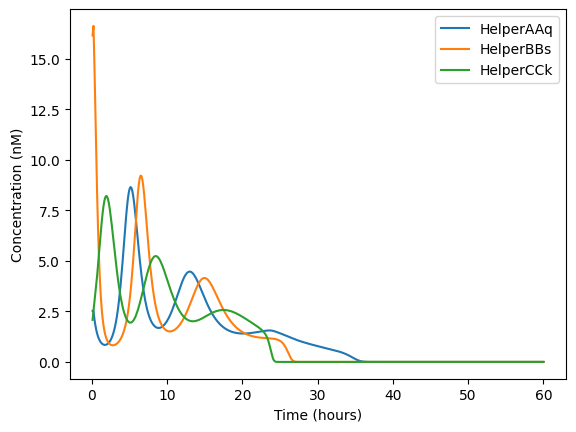

In [373]:
df = plot_file_dhelper('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_srini/leaky/plots/leaky',
              sep=',', 
              x='time', 
              ys=['HelperAAq', 'HelperBBs', 'HelperCCk'], 
              labels=['HelperAAq', 'HelperBBs', 'HelperCCk'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid', 'solid', 'solid'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             )
# df

['time', 'Cj', 'Ck', 'O1']


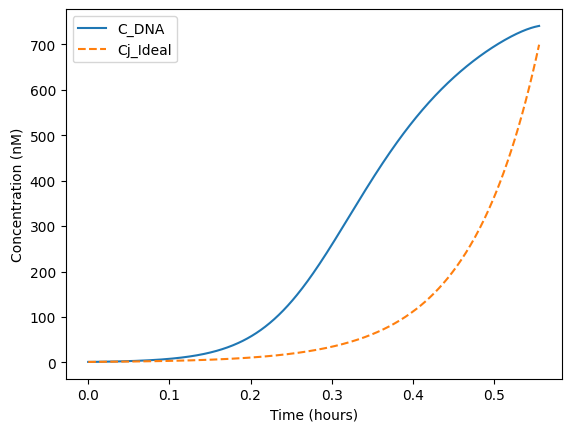

In [374]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'O': ['O1']
               },
               labels=['C_DNA', 'Cj_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'O1']


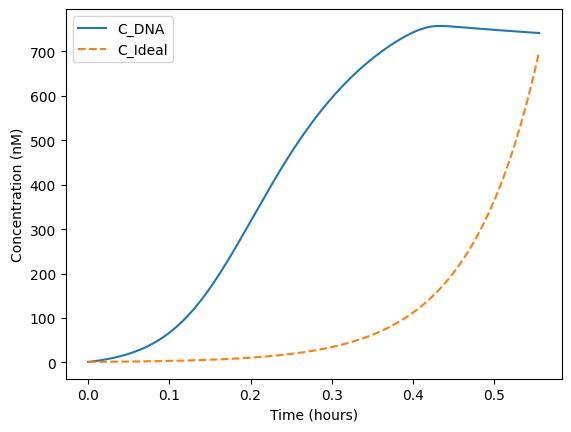

In [375]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky/plots/leaky', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'O': ['O1']
               },
               labels=['C_DNA', 'C_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'shCj', 'Ck', 'shCk', 'O1']


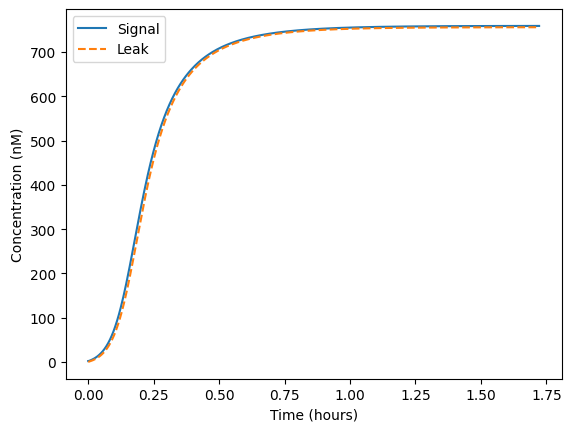

In [376]:
# No shadow cancellation
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky_shadow/plots/leaky_shadow_nocancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'shC': ['shCj', 'shCk']
#                    'O': ['O1']
               },
               labels=['Signal', 'Leak'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC', 'ReactCBCj', 'O1']


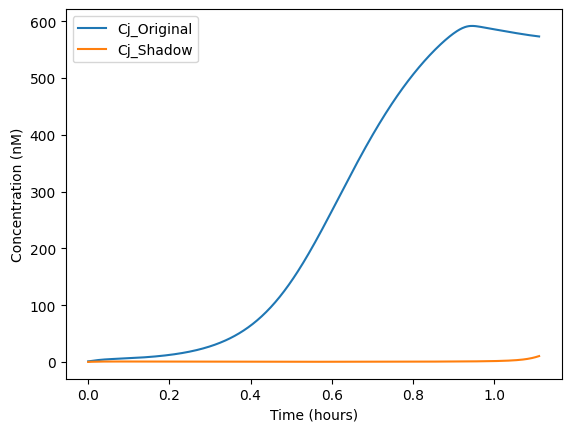

In [31]:
# With shadow cancellation
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'shC': ['shCj', 'shCk'],
#                    'O': ['O1']
               },
               labels=['Cj_Original', 'Cj_Shadow'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Biamp

['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']


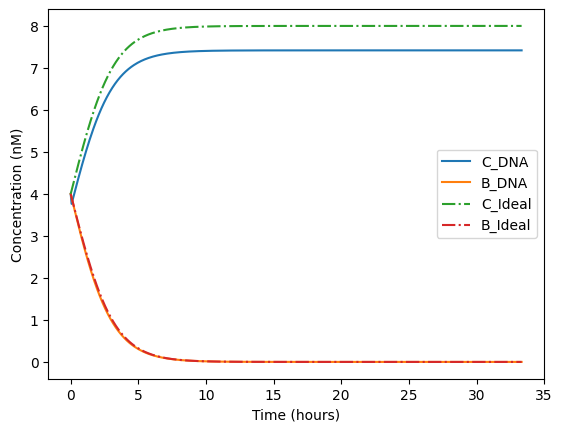

In [285]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid' ,'dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']


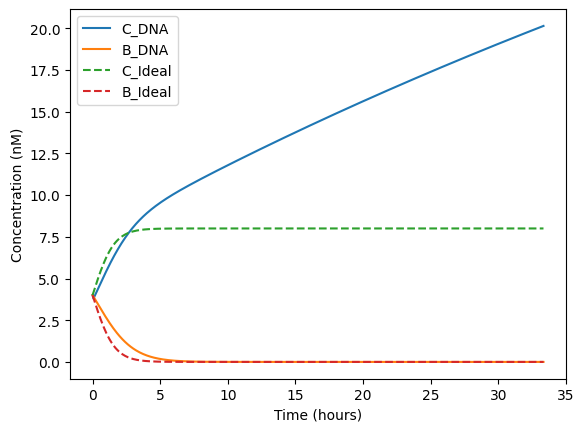

In [286]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky/plots/leaky', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid' ,'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


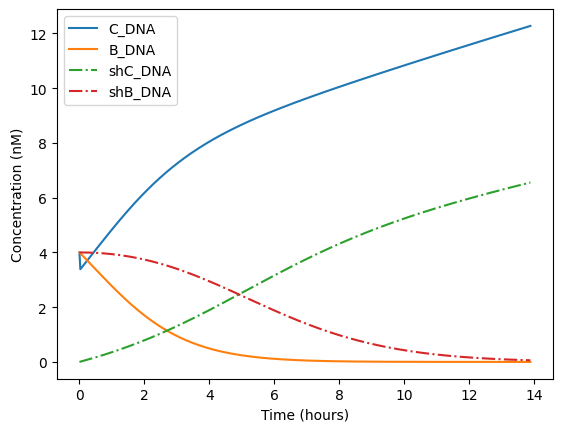

In [287]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow_nocancel/plots/leaky_shadow_nocancel', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'shC': ['shCj', 'shCk'],
                   'shB': ['shBr'],
#                    'O1': ['O1'],
#                    'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'shC_DNA', 'shB_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashdot', 'dashdot', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


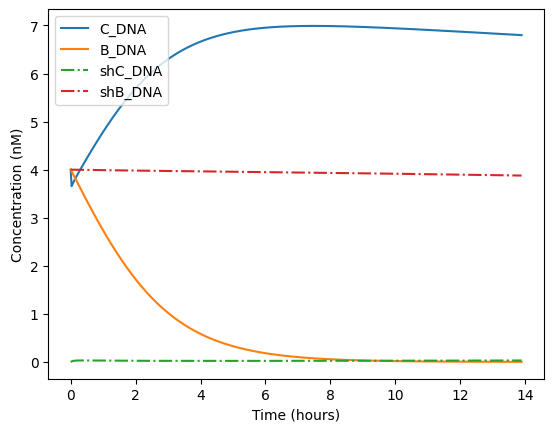

In [288]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'shC': ['shCj', 'shCk'],
                   'shB': ['shBr'],
#                    'O1': ['O1'],
#                    'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'shC_DNA', 'shB_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashdot', 'dashdot', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# RPS

In [24]:
REG_FOLDER='rps_v2'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


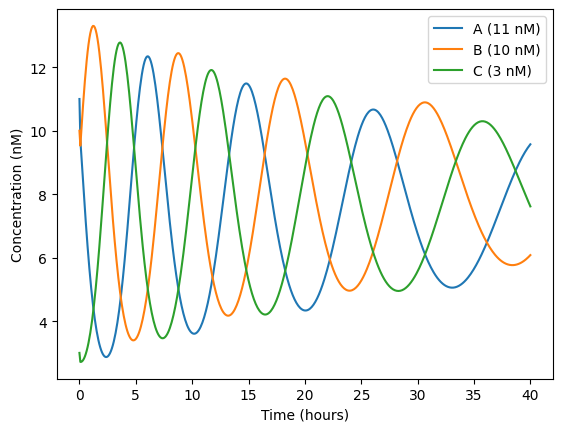

In [25]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


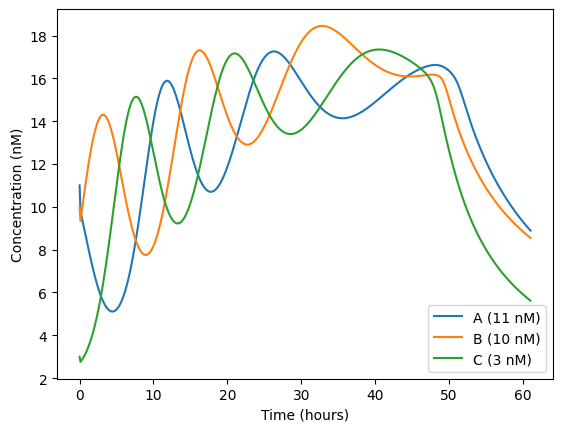

In [14]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'Aq', 'Bs', 'Ck']


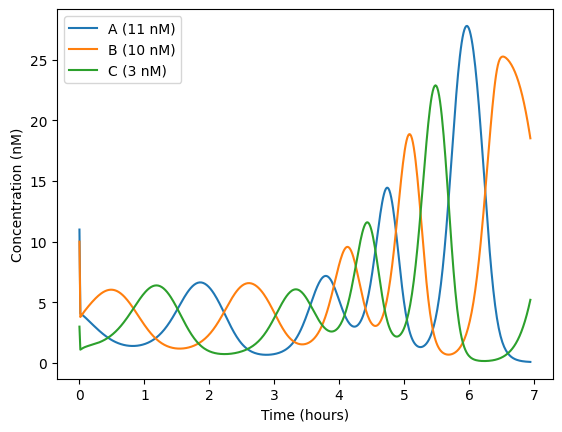

In [15]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# RPS Srinivas et al. 

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


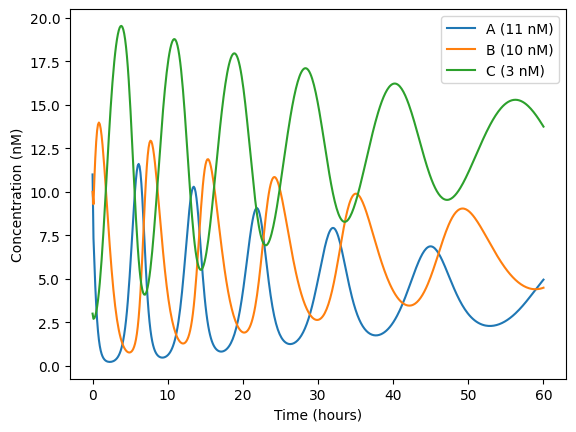

In [16]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_srini/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'HelperAAq', 'HelperBBs', 'HelperCCk']


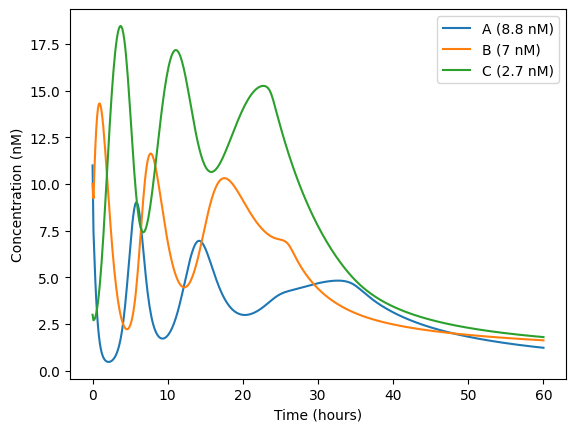

In [169]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_srini/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (8.8 nM)', 'B (7 nM)', 'C (2.7 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# RPS V2

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


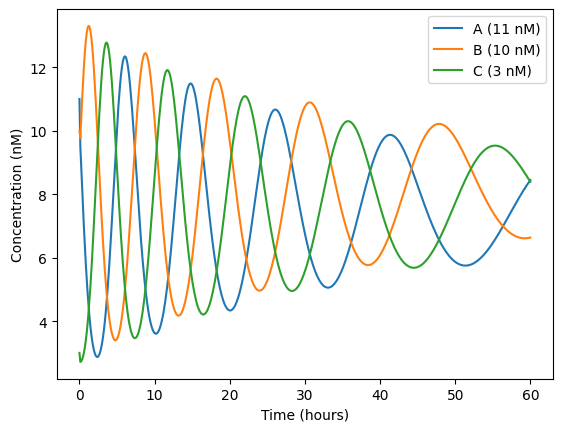

In [119]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


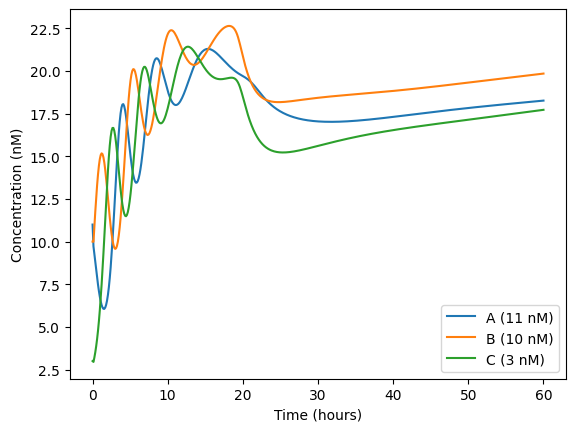

In [120]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


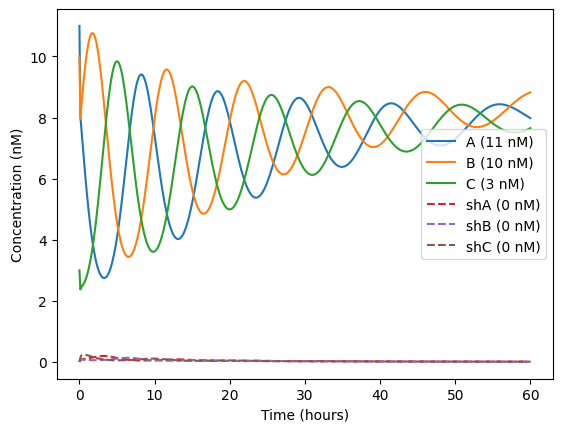

In [121]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],  
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)', 'shA (0 nM)', 'shB (0 nM)', 'shC (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


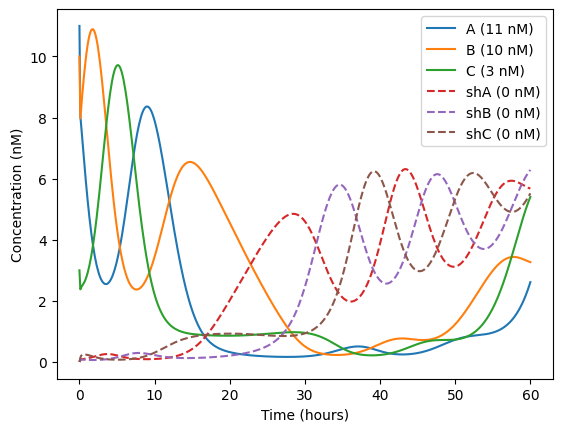

In [136]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow/plots/leaky_shadow_nobuffer', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],  
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)', 'shA (0 nM)', 'shB (0 nM)', 'shC (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Consensus

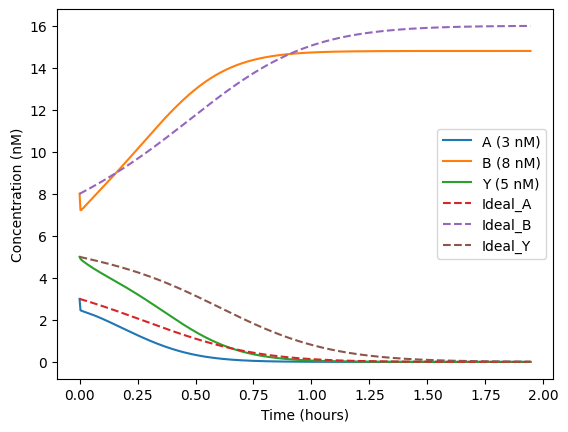

In [111]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con/original/plots/original', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

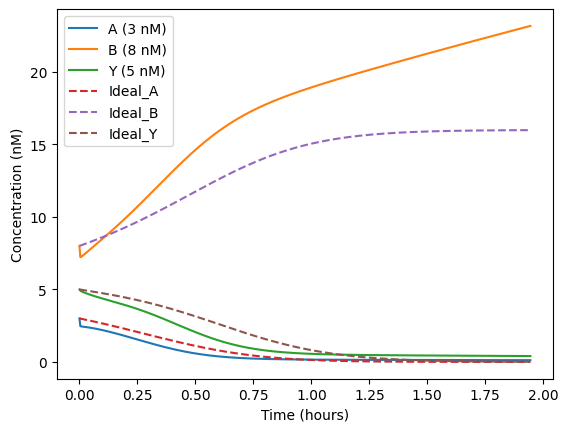

In [112]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con/leaky/plots/leaky', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

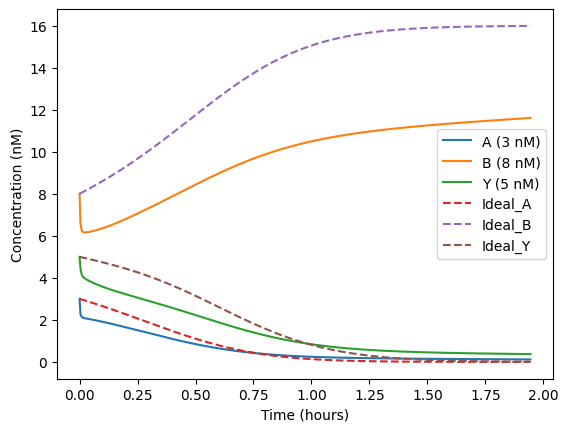

In [113]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Perturbation

In [170]:
FOLDER='rps_v2_pert'

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


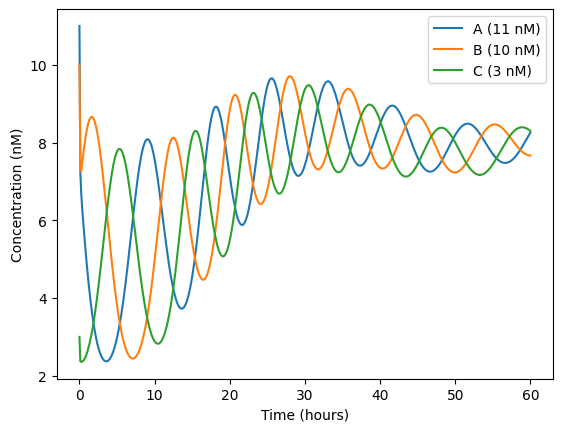

In [171]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


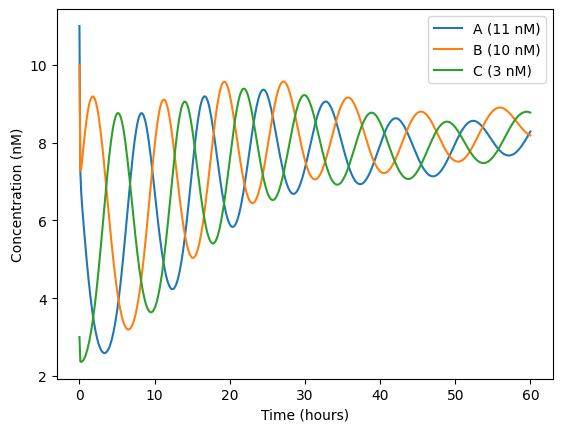

In [172]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/1/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


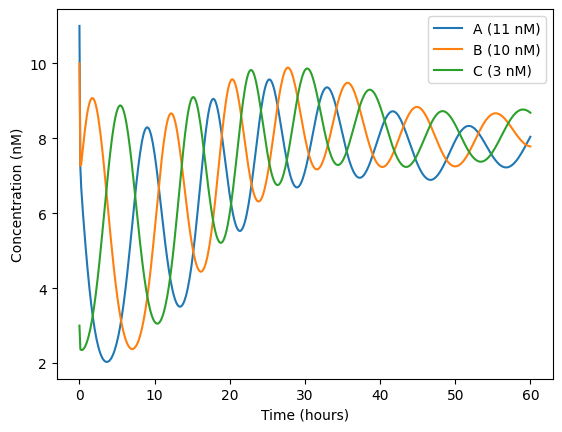

In [173]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


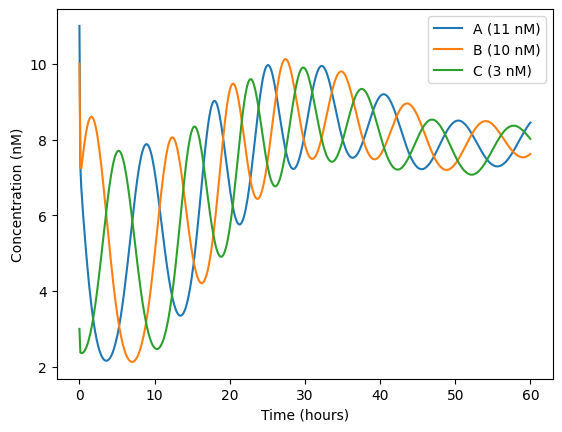

In [174]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/9/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-10X_cancel',
               **kwargs)

# Leaks under Perturbation and Shadow Cancellation

Here, we measure the leak in different cases of Perturbation with and without shadow cancellation. This shows that while in the absence of shadow cancellation the leak is amplified exponentially, in the presence of shadow cancellation, the leak is amplified subexponentially. This can be captured by the behavior of the shadow signal strands. 

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


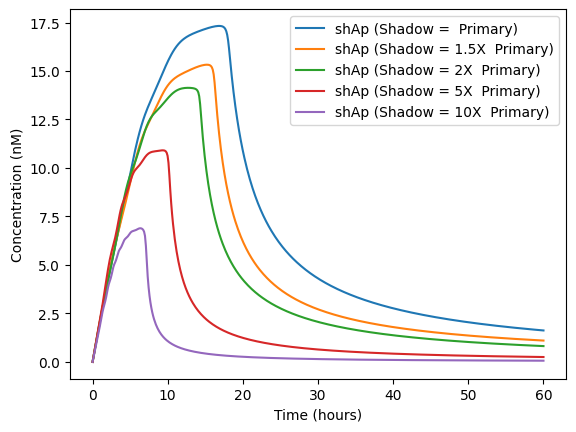

In [177]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shAp (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_nocancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


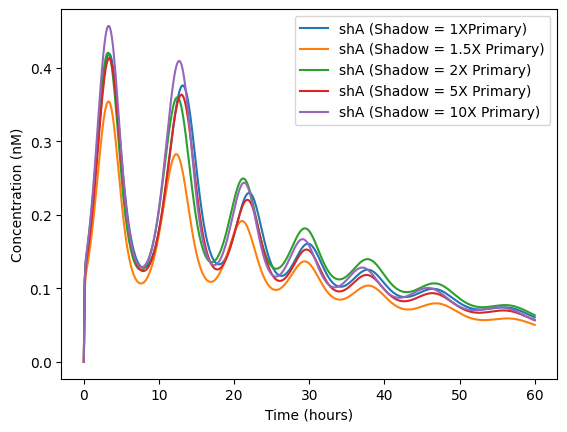

In [178]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = [ '1X', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shA (Shadow = {labels[index]}Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'rps_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


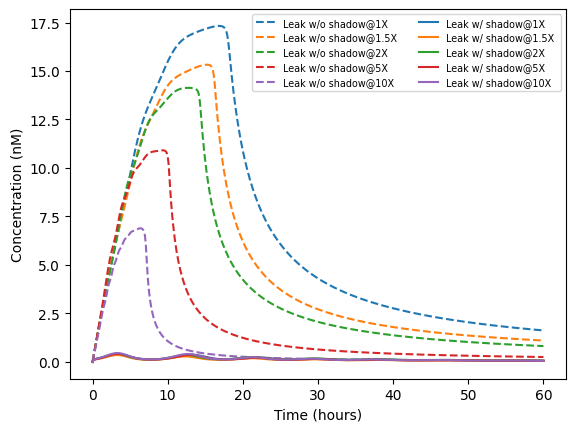

In [179]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak w/o shadow@{labels[index]}'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak w/ shadow@{labels[index]}'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


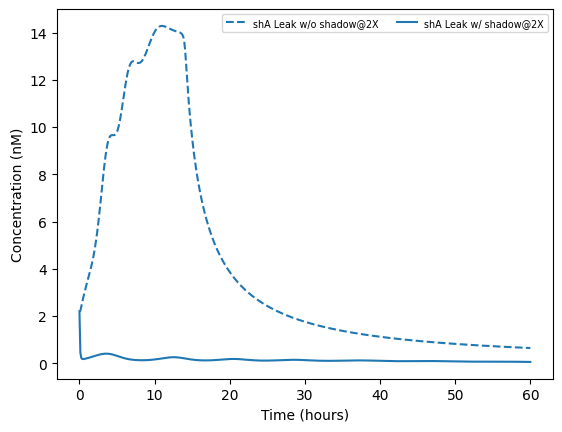

In [180]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shA': ['shAp', 'shAq']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

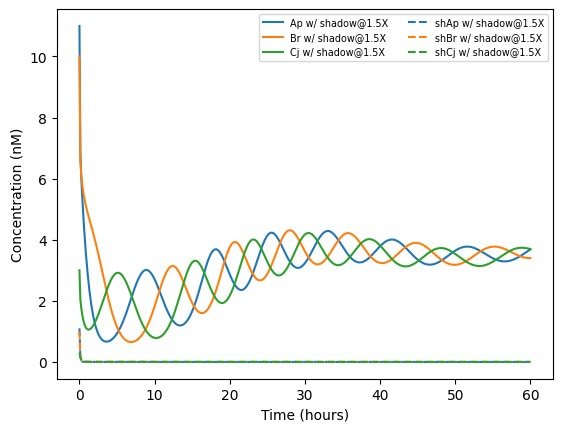

In [181]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_5']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = ['Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj']
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys[:3]] + ['dashed' for y in Ys[3:]], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

## BIAMP Perturbation Experimentsy

In [326]:
FOLDER = 'biamp'

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


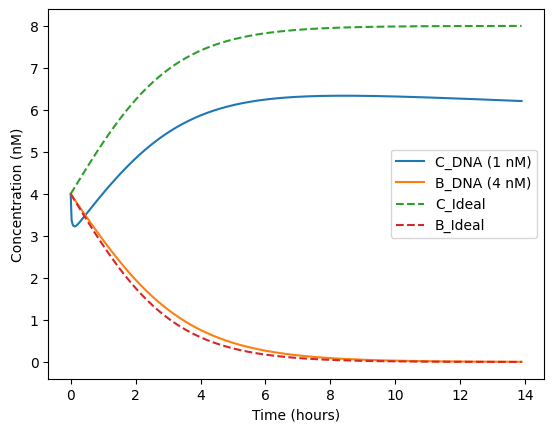

In [327]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


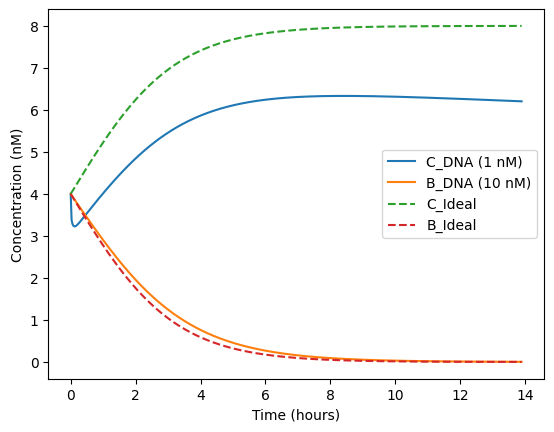

In [328]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/1/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


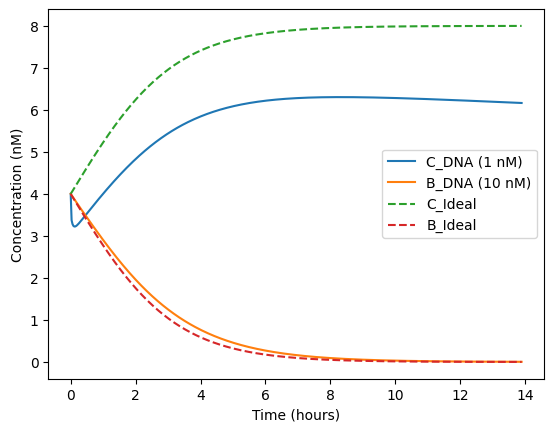

In [329]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


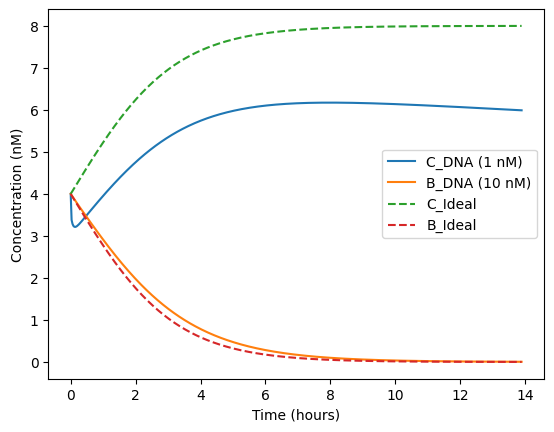

In [330]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/9/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-10X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


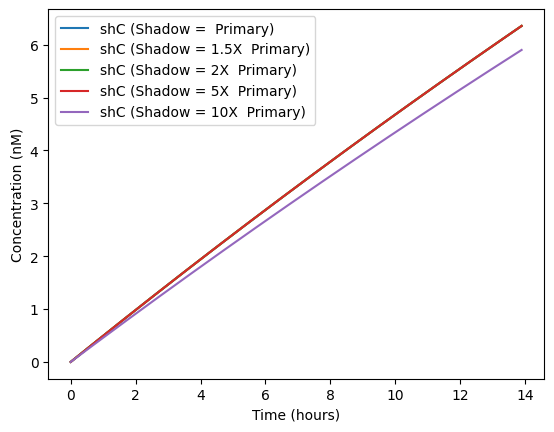

In [331]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


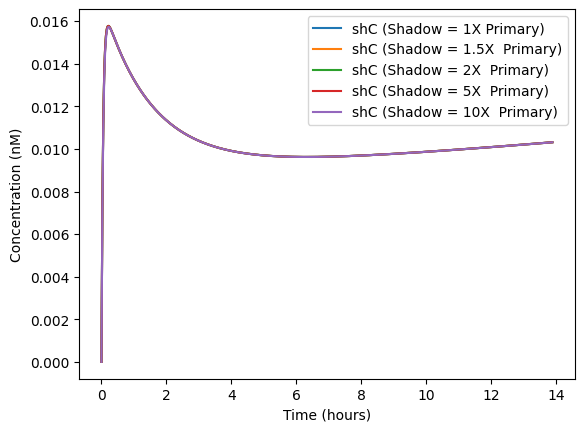

In [332]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = [ '1X', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


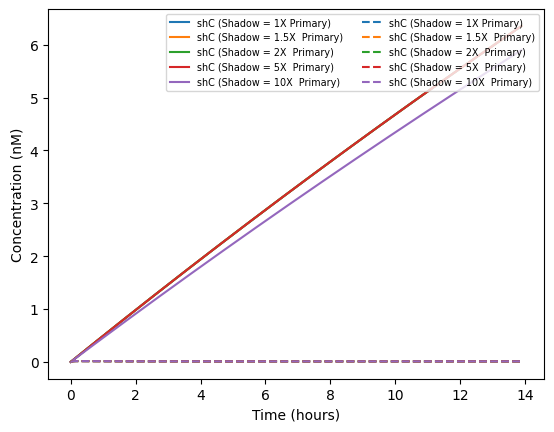

In [333]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


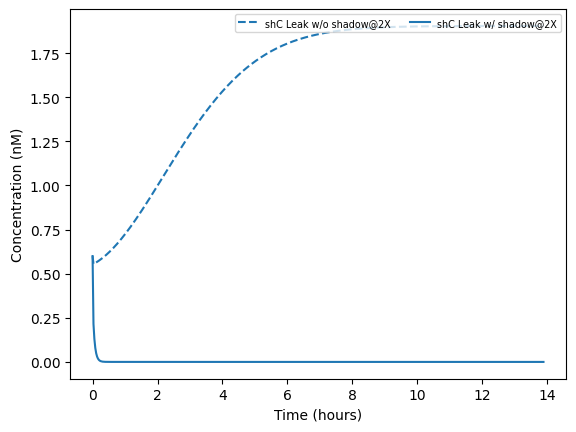

In [334]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shC': ['shCj', 'shCj']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

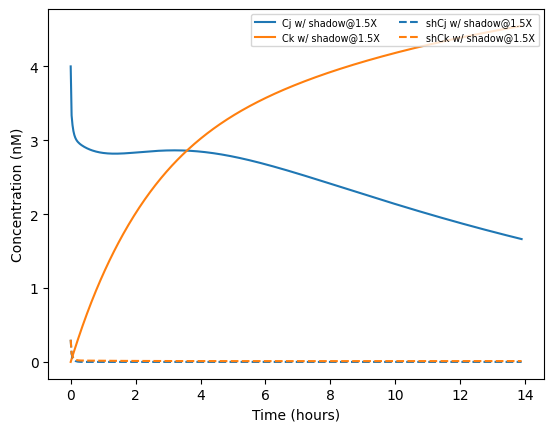

In [335]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_5']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = [ 'Cj', 'Ck', 'shCj', 'shCk']
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys[:2]] + ['dashed' for y in Ys[2:]], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

### BIAMP COMPRESSED

In [377]:
FOLDER = 'biamp_compress'

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']


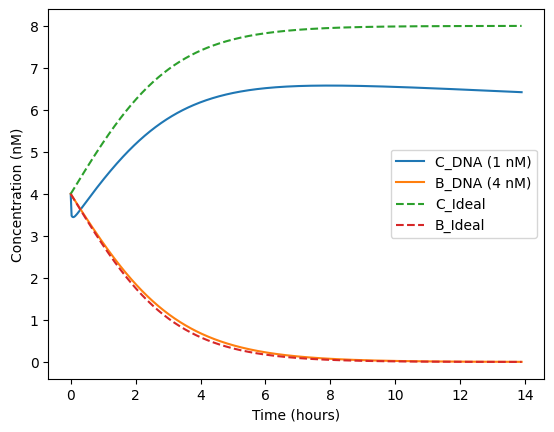

In [378]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']


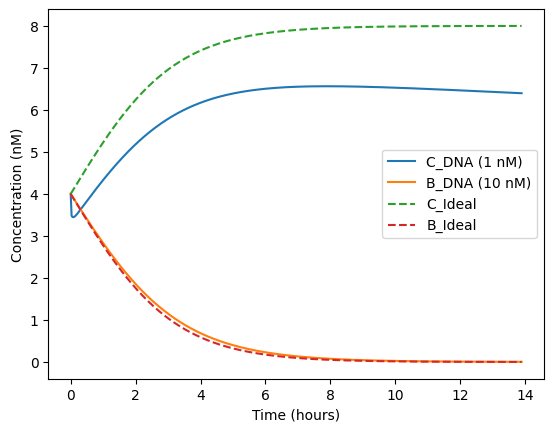

In [379]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/1/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']


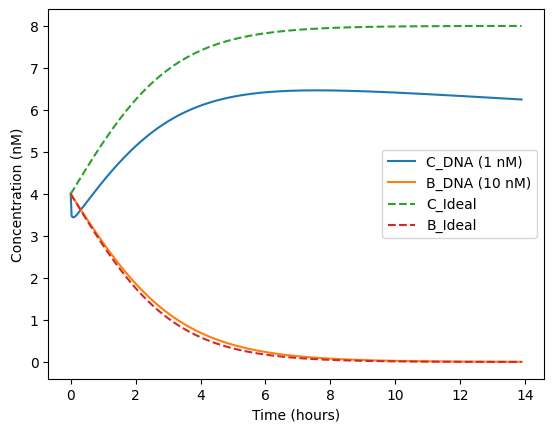

In [380]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']


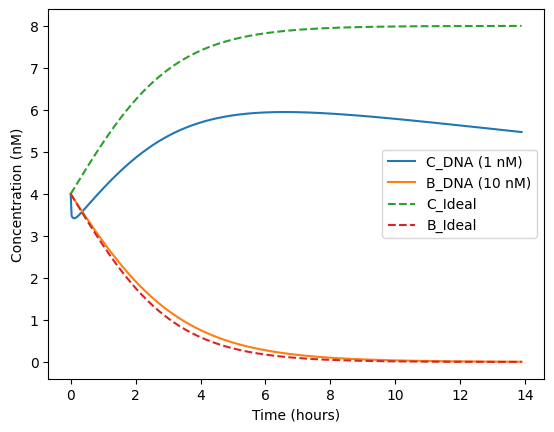

In [381]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/9/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-10X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']


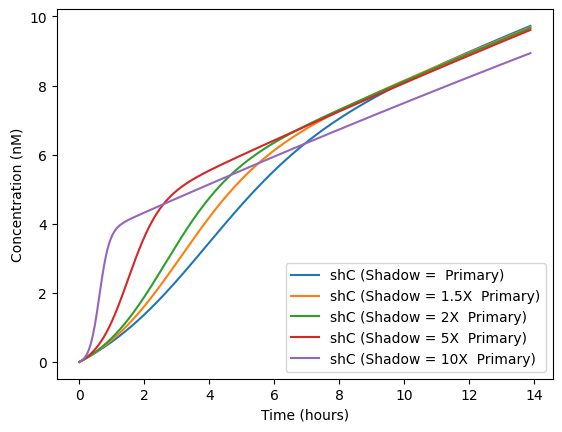

In [382]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']


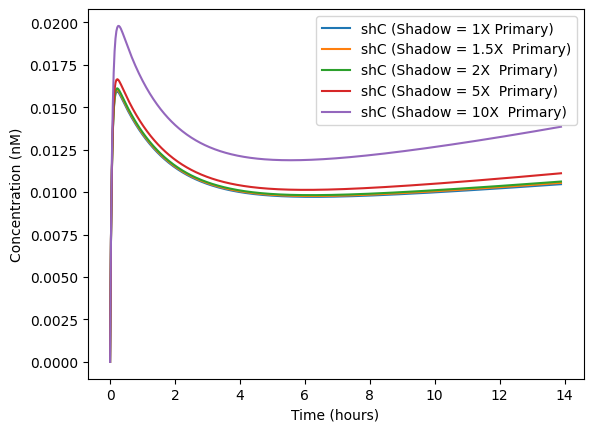

In [383]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = [ '1X', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']


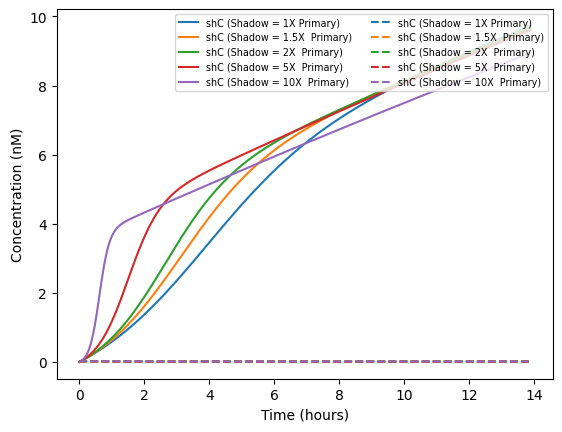

In [384]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2', 'HelperCCj']


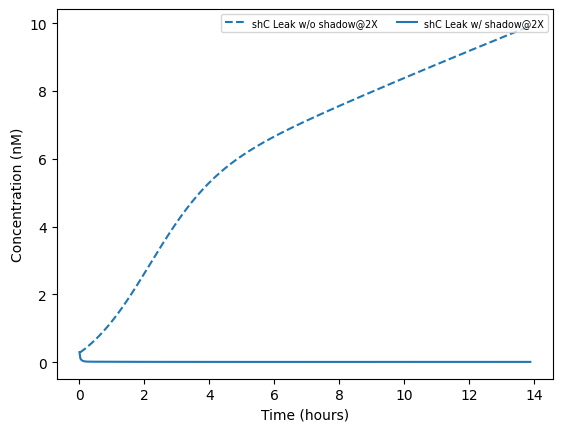

In [385]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shC': ['shCj']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

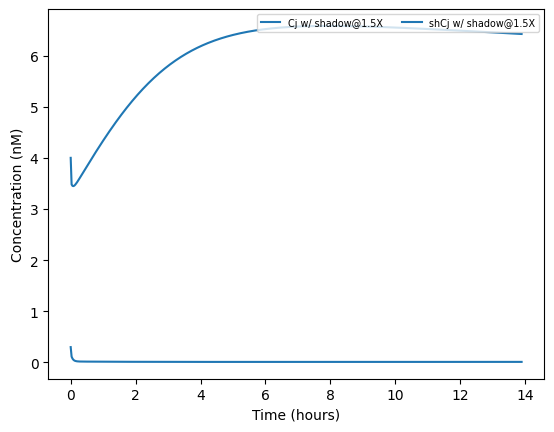

In [386]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_5']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = [ 'Cj', 'shCj']
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys[:2]] + ['dashed' for y in Ys[2:]], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


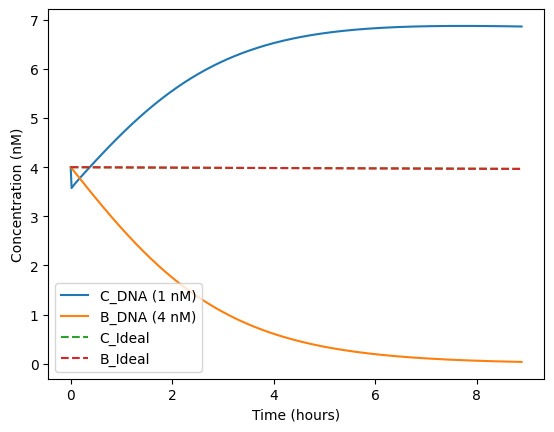

In [393]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_1x', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_1x',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


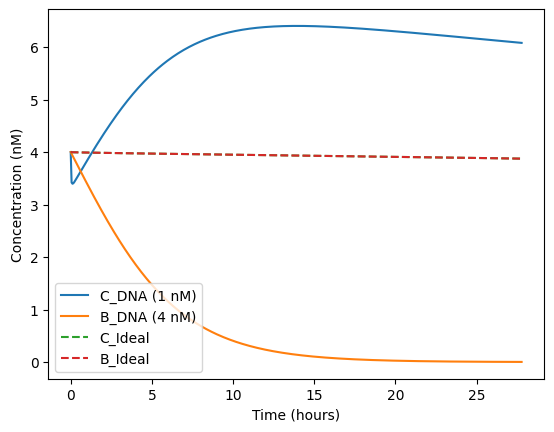

In [392]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_2x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_2x_slower',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


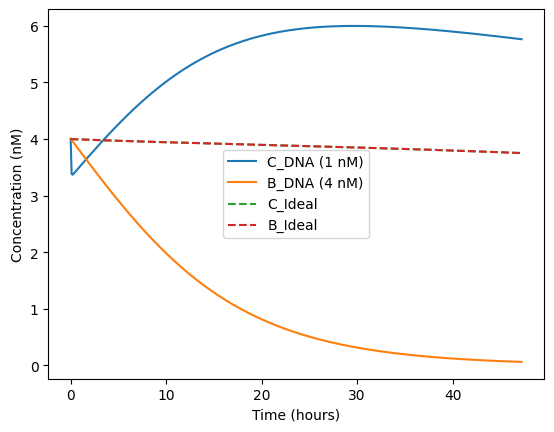

In [396]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_5x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_5x_slower',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


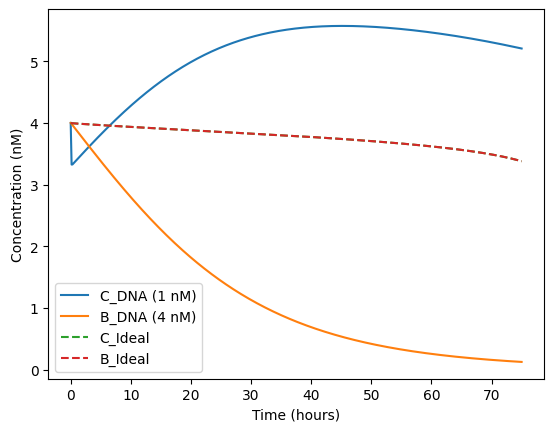

In [395]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_10x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_10x_slower',
               **kwargs)

# Catalysis, Annihilation, and Degradation

ValueError: 'O1' is neither a data key nor a valid format string (unrecognized character 'O')

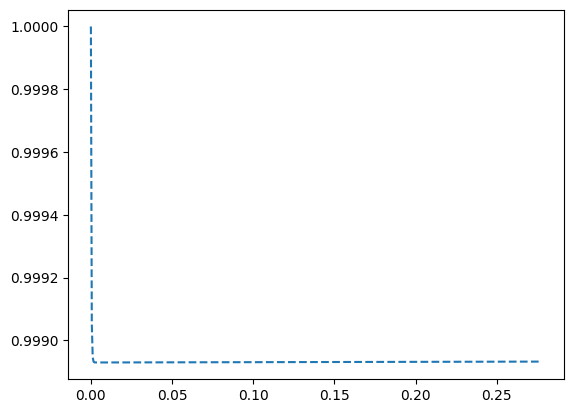

In [389]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r1_cat', 
               x='time', 
               ys=['X1', 'O1', 'X2', 'O2'],
               labels=['X_DNA (1 nM)', 'X_Ideal (1 nM)', 'Y_DNA (0 nM)', 'Y_Ideal (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [ ]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r4_deg', 
               x='time', 
               ys=['X1', 'O1'],
               labels=['Y_Ideal (1 nM)', 'Y_DNA (1 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [ ]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r11_ann', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Xp_DNA', 'Xm_DNA', 'Xp_Ideal', 'Xm_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Control

In [ ]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal', 
               x='time', 
               ys=['Yp', 'Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

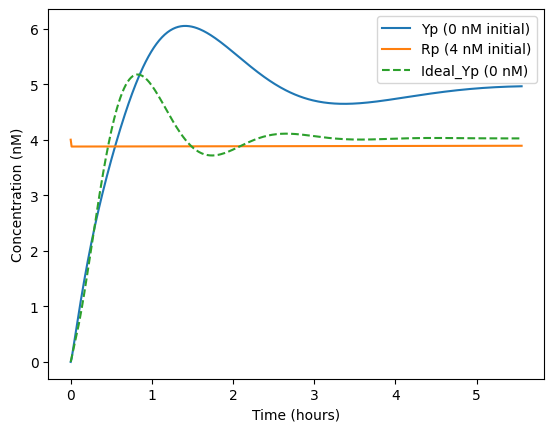

In [17]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky', 
               x='time', 
               ys=['Yp', 'Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

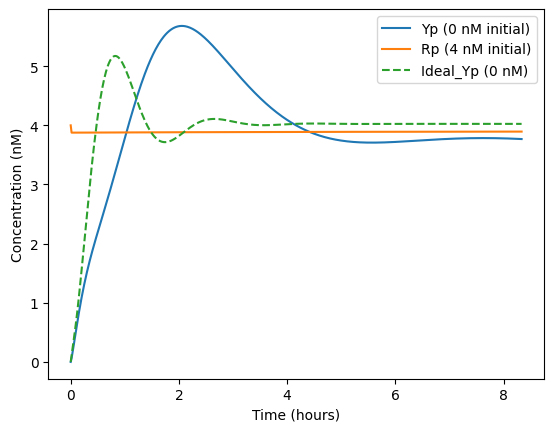

In [18]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky_shadow', 
               x='time', 
               ys=['Yp', 'Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

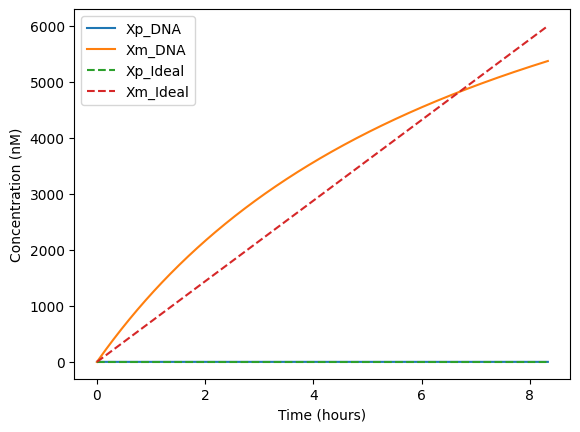

In [40]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r8_prod', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Xp_DNA', 'Xm_DNA', 'Xp_Ideal', 'Xm_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

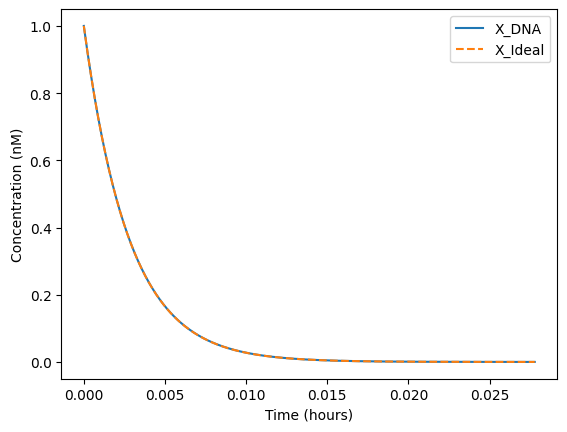

In [41]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r9_cons', 
               x='time', 
               ys=['X1', 'O1'],
               labels=['X_DNA', 'X_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

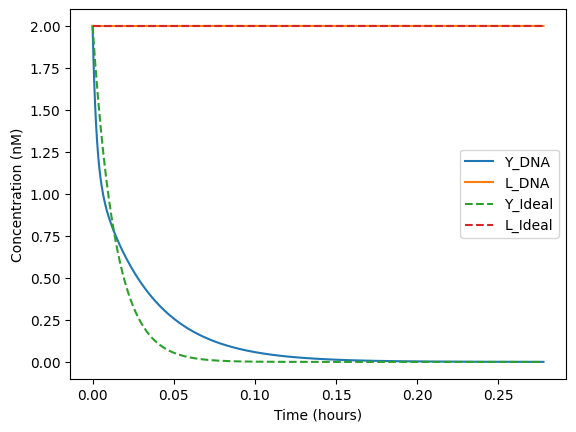

In [42]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r10_load', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Y_DNA', 'L_DNA', 'Y_Ideal', 'L_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)